# Run the file containing the functions used in this script
## By default this is a file called "methane_functions.r" in the working directory of this script
## Do NOT change the working directory at any point while using this script.

In [1]:
methaneFunctions<-paste(getwd(),"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/methane_functions.r"

# 0. Load packages used

In [2]:
# Package names
packages <- c("dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "ggpubr", "tidyverse")
packageHandler(packages)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: viridisLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   0.3.4
✔ tidyr   

# 1. Hardcoded definitions that don't require loading anything?

# 2. Definitions that lead to or require processing data

### Location of data

In [3]:
conductivityDataDir<-"~/Desktop/data/Raw_Sensor_Data/WaterBear_TemperatureConductivity"

ch4DataDir<-"~/Desktop/data/Methane Calibration/Methane_Calibration_Anya/20230530"

co2DataDir<-"~/Desktop/data/Methane Calibration/field_test/20230424_deployment"
outputDir<-"~/Desktop/waterbear/thesisFigures"

GHGduty75DataDir<-"~/Desktop/data/powerTesting/ghg_dutycycle75"
GHGduty50DataDir<-"~/Desktop/data/powerTesting/ghg_dutycycle50"
GHGduty25DataDir<-"~/Desktop/data/powerTesting/ghg_dutycycle25"

#### Read in data

In [4]:
# conductivityData<-concat_dirs(directory=conductivityDataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
# head(conductivityData)
# names(conductivityData)

In [5]:
# saveDFcsv(conductivityData)

conductivityData<-read.csv("~/Desktop/waterbear/thesisFigures/conductivityData.csv",header=TRUE)

In [6]:
ch4Data<-concat_dirs(directory = ch4DataDir,readFn = read_rriv_CSV, filePattern = "CSV", minFileSize = 500)
# head(ch4Data)
# names(ch4Data)
ch4Data<-process_rriv_columns(ch4Data)

UUIDdict=c(
    "57FF6E068387575148360767"="1",
    "57FF6D068387575151290167"="2",
    "57FF6F068387575149330867"="3",
    "57FF6E068387575140070767"="4",
    "50FF74068678545256252467"="5")
UUIDdict

ch4Data<-createSensorColFromIDs(ch4Data,idCol = "uuid",dict = UUIDdict)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


57FF6E068387575148360767 57FF6D068387575151290167 57FF6F068387575149330867 
                     "1"                      "2"                      "3" 
57FF6E068387575140070767 50FF74068678545256252467 
                     "4"                      "5"

Warning message:
“Unknown or uninitialised column: `Sensor`.”


In [7]:
# unique(ch4Data$Sensor)

In [8]:
lgrData<-concat_dirs(directory = ch4DataDir,readFn = read_GA_ZIP, filePattern = ".zip$", minFileSize = 500)
# head(lgrData)
# names(lgrData)

clean_temp()

lgrData$Time<-lubridate::as_datetime(lgrData$Time)

# str(lgrData)

[1] "Dataframe generated, manually process column types if necessary"


In [9]:
co2Data<-concat_dirs(directory = co2DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
# head(co2Data)
# names(co2Data)

co2Data<-process_rriv_columns(co2Data)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


In [10]:
ghg75_data<-concat_dirs(directory=GHGduty75DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
ghg50_data<-concat_dirs(directory=GHGduty50DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
ghg25_data<-concat_dirs(directory=GHGduty25DataDir,readFn=read_rriv_CSV,filePattern="CSV",minFileSize=500)

ghg75_data<-process_rriv_columns(ghg75_data)
ghg50_data<-process_rriv_columns(ghg50_data)
ghg25_data<-process_rriv_columns(ghg25_data)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”


[1] "Dataframe generated, manually process column types if necessary"


In [11]:
# str(ghg50_data)

In [12]:
# head(ghg50_data)

In [13]:
ghg75_data$battery.mV<-ghg75_data$battery.V*5000/4096
ghg50_data$battery.mV<-ghg50_data$battery.V*5000/4096
ghg25_data$battery.mV<-ghg25_data$battery.V*5000/4096

In [14]:
# head(ghg50_data)

ghg75_summary<-ghg75_data[ghg75_data$type=="summary",]
ghg75_raw<-ghg75_data[ghg75_data$type=="raw",]

ghg50_summary<-ghg50_data[ghg50_data$type=="summary",]
ghg50_raw<-ghg50_data[ghg50_data$type=="raw",]

ghg25_summary<-ghg25_data[ghg25_data$type=="summary",]
ghg25_raw<-ghg25_data[ghg25_data$type=="raw",]

# CH4 vs LGR Figures

In [15]:
# CH4 vs lgr
names(ch4Data)
names(lgrData)

range_ch4<-range(ch4Data$time.h)
range_ch4

range_lgr<-range(lgrData$Time)
range_lgr

overlapStart<-max(range_lgr[1], range_ch4[1])
overlapEnd<-min(range_lgr[2], range_ch4[2])

overlapStart
overlapEnd

[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4_raw"          "ch4_cal"          "user_note"       
[17] "user_value"       "Sensor"

[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

[1] "2023-05-30 14:51:02 UTC" "2023-05-30 17:20:25 UTC"

[1] "2023-05-30 15:02:26 UTC" "2023-05-30 17:09:20 UTC"

[1] "2023-05-30 15:02:26 UTC"

[1] "2023-05-30 17:09:20 UTC"

In [16]:
# initial subset of ch4 and lgr data
ol_ch4<-ch4Data[ch4Data$time.h>overlapStart & ch4Data$time.h<overlapEnd,]
ol_lgr<-lgrData[lgrData$Time>overlapStart & lgrData$Time<overlapEnd,]

range(ol_ch4$time.h)
range(ol_lgr$Time)

[1] "2023-05-30 15:02:26 UTC" "2023-05-30 17:09:19 UTC"

[1] "2023-05-30 15:04:07 UTC" "2023-05-30 17:07:39 UTC"

In [17]:
ol_ch4_summary<-ol_ch4[ol_ch4$type=="summary",]
head(ol_ch4_summary)

type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,burstCycle,aht_C,aht_RH,ch4_raw,ch4_cal,user_note,user_value,Sensor
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459006,2023-05-30 15:03:25,1159,35849,12,37.288,46.330,680.5,0,NA,NA,1
summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459066,2023-05-30 15:04:25,1155,35849,13,37.427,46.559,666.9,0,NA,NA,1
summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459126,2023-05-30 15:05:25,1154,35849,14,37.559,46.719,655.1,0,NA,NA,1
summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459186,2023-05-30 15:06:25,1153,35849,15,37.643,46.796,644.7,0,NA,NA,1
summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459246,2023-05-30 15:07:25,1205,35849,16,37.718,46.902,808.3,0,NA,NA,1
summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459306,2023-05-30 15:08:25,1199,35849,17,37.787,46.996,794.5,0,NA,NA,1


# interpolate summary ch4 lines and lgr data

In [18]:
# Manually create dictionary for column names, and what to rename them to in output df
interpolateDict<-c(
        "ch4_raw"="ch4_raw_rriv",
        "aht_C"="aht_C",
        "aht_RH"="aht_RH",
        "dht_C"="dht_C",
        "dht_RH"="dht_RH",
        "X.CH4._ppm"="ch4_ppm_lgr")

In [19]:
interpolateData<-function(df1=ol_ch4_summary, df1TimeCol="time.h",
                          df2=ol_lgr, df2TimeCol="Time",
                          iDict=interpolateDict){
    iD<-iDict
    iKeys<-names(iD)
    
    # extract time range for first data frame
    df1r<-range(df1[[ df1TimeCol ]])

    # extract time range for second data frame
    df2r<-range(df2[[ df2TimeCol ]])

    # create output dataframe using whichever time range is larger
    # use sequence to create minute intervals across the range for data points in a new dataframe
    if(df1r[2]-df1r[1] > df2r[2]-df2r[1]){
        print("df1 time range is larger")
        outputDF<-data.frame(time_utc=seq(df1r[1],df1r[2], by="min"))
    } else{
        print("df2 time range is larger")
        outputDF<-data.frame(time_utc=seq(df2r[1],df2r[2], by="min"))
    }
    
    # extract column names from dataframe 1
    cols<-names(df1)

    # only interpolate data that is both in the dictionary and in the column names
    for(key in iKeys[iKeys %in% cols]){
        outputDF[[ iD[[key]] ]]<-approx(df1[[df1TimeCol]], df1[[key]], outputDF[["time_utc"]])$y
    }

    # extract column names from dataframe 2
    cols<-names(df2)

    # only interpolate data that is both in the dictionary and in the column names
    for(key in iKeys[iKeys %in% cols]){
        outputDF[[ iD[[key]] ]]<-approx(df2[[df2TimeCol]], df2[[key]], outputDF[["time_utc"]])$y
    }

    # remove lines with NA
    outputDF<-outputDF[complete.cases(outputDF),]
    
    return(outputDF)
}

In [20]:
# interpolate data for each uuid then merge via rbind()
interpolated_data<-data.frame()

sensorList<-unique(ol_ch4_summary$Sensor)

for(sensor in sensorList){
    subset<-ol_ch4_summary[ol_ch4_summary$Sensor==sensor,]
    temp<-interpolateData(df1=subset)
    temp$Sensor=sensor
    interpolated_data<-rbind(interpolated_data, temp)
}
unique(interpolated_data$Sensor)

[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"


[1] "1" "2" "3" "4" "5"

In [21]:
# custom color blind color palettes:
# https://davidmathlogic.com/colorblind/#%237000CC-%23E22C7B-%23FFAF2A-%2300CACA-%23046CC5-%23CB60E6-%23349634-%23E47D00
custom_colors=c('#7000CC','#E22C7B','#FFAF2A','#00CACA','#046CC5','#CB60E6','#349634','#E47D00') #00AAAA

In [22]:
# +
#         geom_point(size=2)+geom_line(size=1)+theme_classic(base_size=18)+
#         labs(x="Time (hr:min)", y=ylabs[i], color="Logger")+
#         scale_color_manual(values=custom_colors,na.translate=F)+
#         scale_x_datetime(date_labels="%H:%M",breaks=scales::pretty_breaks(n=4),expand=c(0,60*1.5))

In [23]:
names(interpolated_data)
interpolated_data$ch4_raw_rriv_mV<-interpolated_data$ch4_raw_rriv*5000/4096

head(interpolated_data$ch4_raw_rriv_mV)

[1] "time_utc"     "ch4_raw_rriv" "aht_C"        "aht_RH"       "ch4_ppm_lgr" 
[6] "Sensor"

[1] 814.1013 799.7124 787.0247 985.8798 969.9311 946.8429

In [24]:
range(interpolated_data$time_utc)

[1] "2023-05-30 15:04:25 UTC" "2023-05-30 17:07:26 UTC"

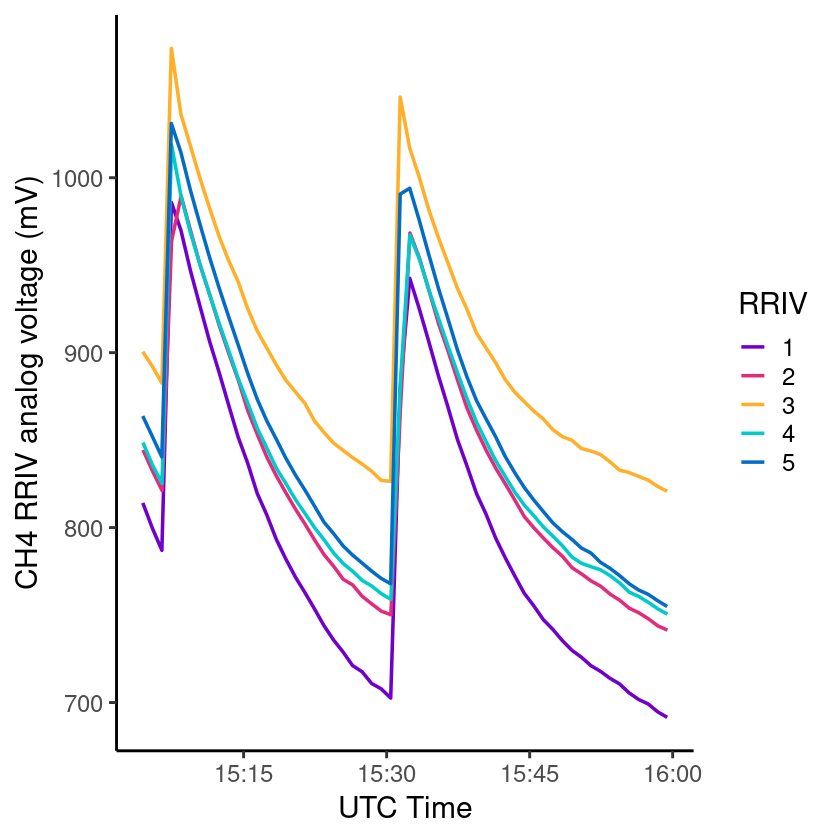

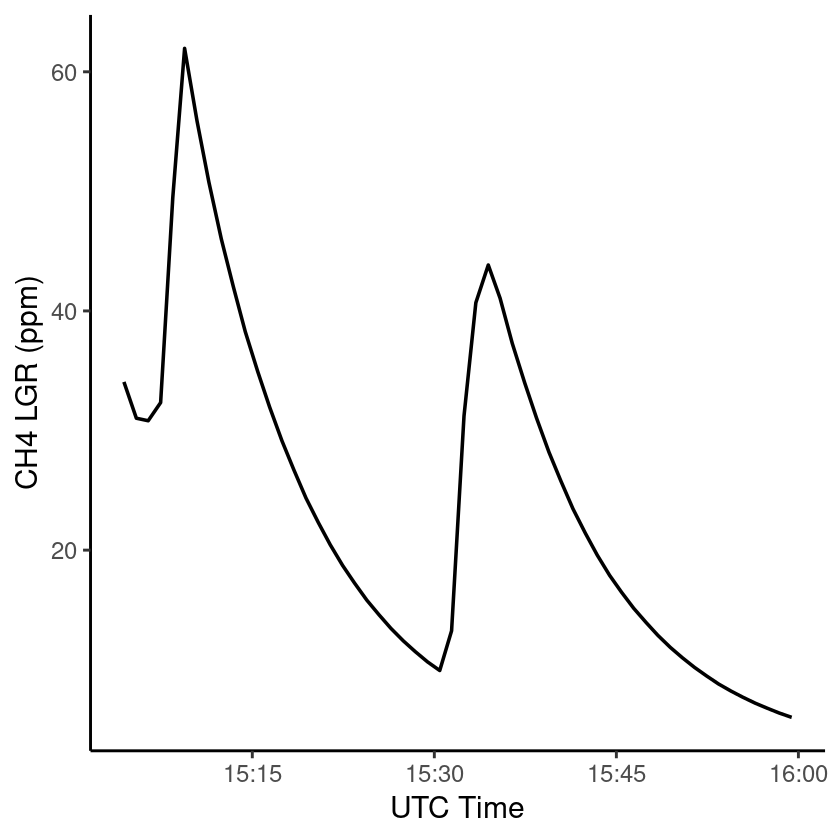

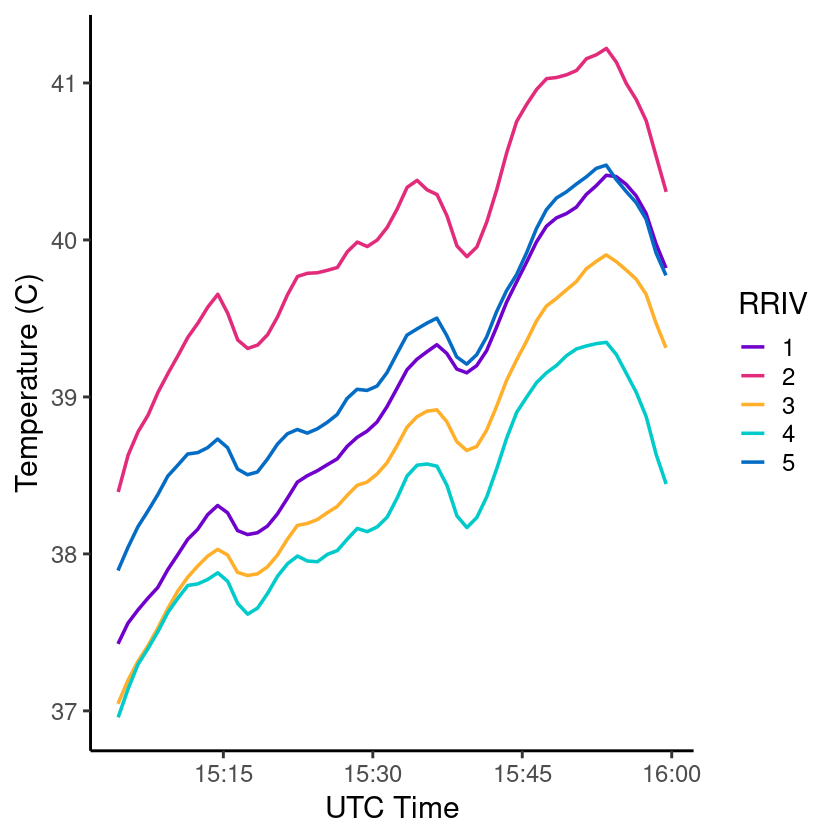

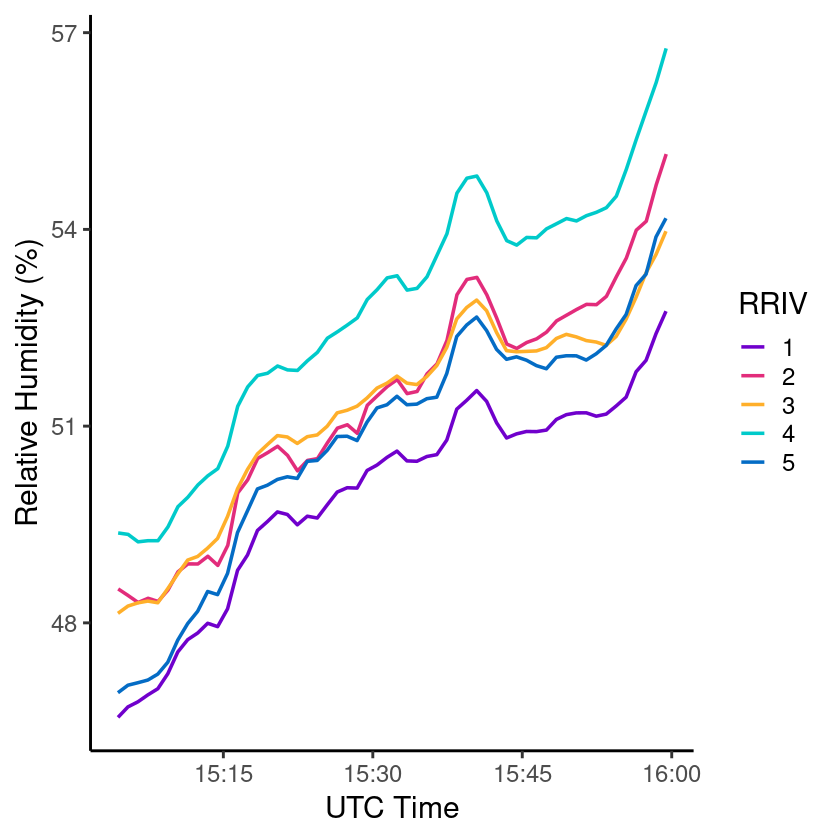

In [25]:
timeStart<-lubridate::as_datetime("2023-05-30 15:00:00 UTC")
timeEnd<-lubridate::as_datetime("2023-05-30 16:00:00 UTC")

subset<-interpolated_data[interpolated_data$time_utc>timeStart & interpolated_data$time_utc<timeEnd,]

A<-ggplot(subset, aes(x=time_utc, y=ch4_raw_rriv_mV, color=Sensor))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y="CH4 RRIV analog voltage (mV)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
A

B<-ggplot(subset, aes(x=time_utc, y=ch4_ppm_lgr))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y="CH4 LGR (ppm)")
B

C<-ggplot(subset, aes(x=time_utc, y=aht_C, color=Sensor))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y="Temperature (C)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
C

D<-ggplot(subset, aes(x=time_utc, y=aht_RH, color=Sensor))+geom_line(size=1)+
    theme_classic(base_size=18)+
    labs(x="UTC Time",y="Relative Humidity (%)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
D

In [26]:
# ggplot(subset, aes(x=time_utc, y=ch4_raw_rriv, color=Sensor))+geom_line(size=1)+
# theme_classic(base_size=18)+
# labs(x="UTC Time",y="CH4 RRIV digital reading")+
# scale_color_manual(values=custom_colors, name="RRIV")

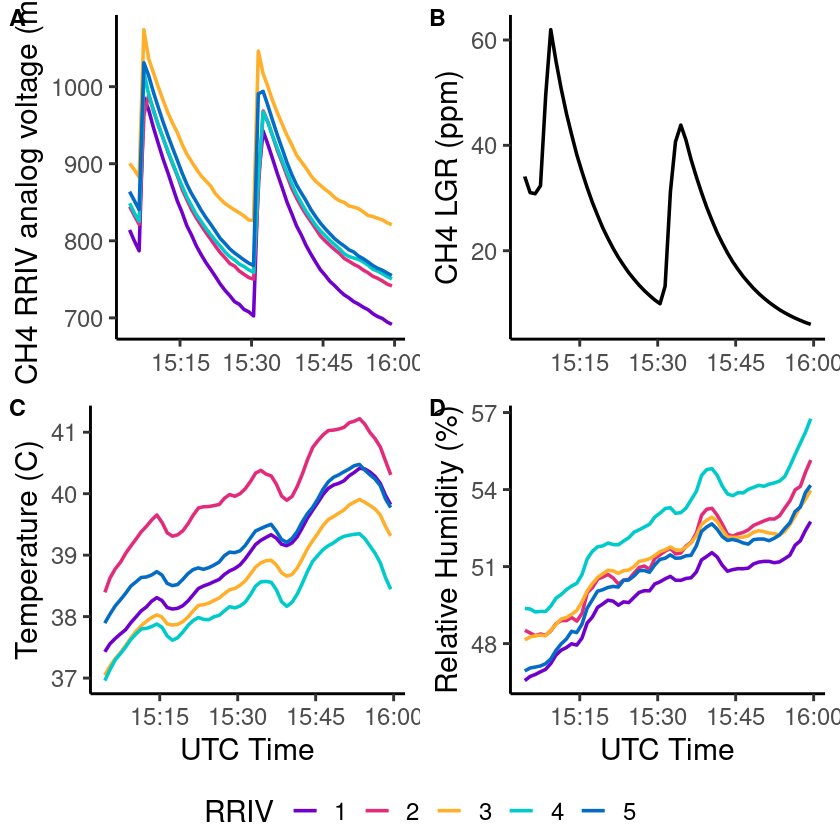

In [27]:
methaneConfiguration<-ggarrange(A+rremove("x.title"),
          B+rremove("x.title"), C, D,
          labels=c("A","B","C","D"),
          common.legend=TRUE,
          legend="bottom"
         )
methaneConfiguration

In [28]:
savePlot(plot = methaneConfiguration,tag = "methaneConfiguration4")

png 
  2

# CO2 data

In [29]:
head(co2Data)

type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,burstCycle,dht_C,dht_RH,atlas_CO2_ppm,ch4rf_raw,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374938,2023-04-24 22:22:17,1320,1,1,18.9,29.0,1595,1926,0,1127,0,NA,NA
raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374940,2023-04-24 22:22:20,1237,1,1,18.9,29.0,1593,1929,0,1124,0,NA,NA
raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374943,2023-04-24 22:22:22,1222,1,1,19.0,31.0,1592,1926,0,1123,0,NA,NA
raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374945,2023-04-24 22:22:25,1223,1,1,19.0,31.0,1590,1927,0,1123,0,NA,NA
raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374948,2023-04-24 22:22:27,1221,1,1,19.0,31.1,1589,1925,0,1125,0,NA,NA
raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374950,2023-04-24 22:22:30,1220,1,1,19.0,31.1,1587,1926,0,1123,0,NA,NA


In [30]:
rawco2<-co2Data[co2Data$type=="raw",]
summaryco2<-co2Data[co2Data$type=="summary",]

In [31]:
summaryco2$ch4_raw_mV<-summaryco2$ch4_raw*5000/4096
head(summaryco2)

type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,⋯,dht_C,dht_RH,atlas_CO2_ppm,ch4rf_raw,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,ch4_raw_mV
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
summary,PWAD3,21005,fieldCal_CH004-57FF6A068387575136311367-1682375265,1682375265,57FF6A068387575136311367,1682375377,2023-04-24 22:29:37,1651,2,⋯,18.06,29.02,1068.7,2004.7,0,351.6,0,NA,NA,429.1992
summary,PWAD3,21005,fieldCal_CH004-57FF6A068387575136311367-1682375265,1682375265,57FF6A068387575136311367,1682375437,2023-04-24 22:30:37,1655,2,⋯,18.18,29.28,1027.2,2014.6,0,402.5,0,NA,NA,491.3330
summary,PWAD3,21005,fieldCal_CH004-57FF6A068387575136311367-1682375265,1682375265,57FF6A068387575136311367,1682375497,2023-04-24 22:31:37,1648,2,⋯,18.28,29.00,1013.7,2022.2,0,436.7,0,NA,NA,533.0811
summary,PWAD3,21005,fieldCal_CH004-57FF6A068387575136311367-1682375265,1682375265,57FF6A068387575136311367,1682375557,2023-04-24 22:32:37,1651,2,⋯,18.42,28.64,996.4,2028.4,0,459.4,0,NA,NA,560.7910
summary,PWAD3,21005,fieldCal_CH004-57FF6A068387575136311367-1682375265,1682375265,57FF6A068387575136311367,1682375618,2023-04-24 22:33:37,1645,2,⋯,18.58,28.20,985.2,2030.4,0,469.3,0,NA,NA,572.8760
summary,PWAD3,21005,fieldCal_CH004-57FF6A068387575136311367-1682375265,1682375265,57FF6A068387575136311367,1682375678,2023-04-24 22:34:37,1652,2,⋯,18.76,27.76,976.7,2032.0,0,480.8,0,NA,NA,586.9141


In [32]:
subsetco2<-summaryco2[summaryco2$logger != "21005",]
unique(subsetco2$uuid)
UUIDdict=c(
    "57FF6E068387575145101167"="1",
    "57FF74068387575109431367"="2"
    )
UUIDdict

subsetco2<-createSensorColFromIDs(subsetco2,idCol = "uuid",dict = UUIDdict)

range(subsetco2$time.h)

[1] 57FF6E068387575145101167 57FF74068387575109431367
4 Levels: 57FF6A068387575136311367 ... 57FF74068387575109431367

57FF6E068387575145101167 57FF74068387575109431367 
                     "1"                      "2"

Warning message:
“Unknown or uninitialised column: `Sensor`.”


[1] "2023-04-24 22:35:37 UTC" "2023-04-28 05:39:40 UTC"

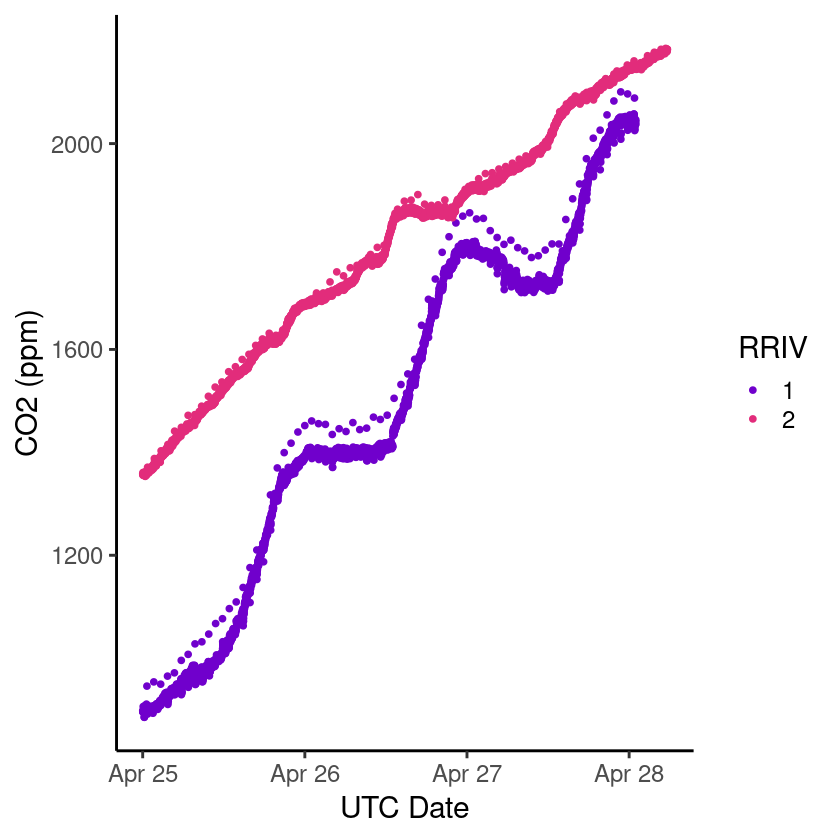

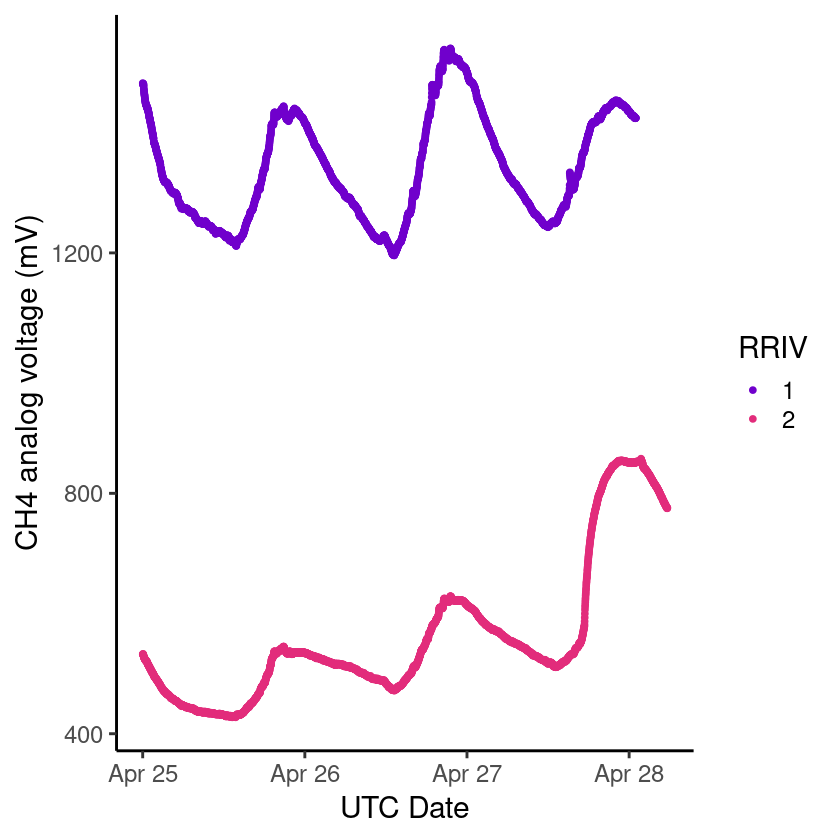

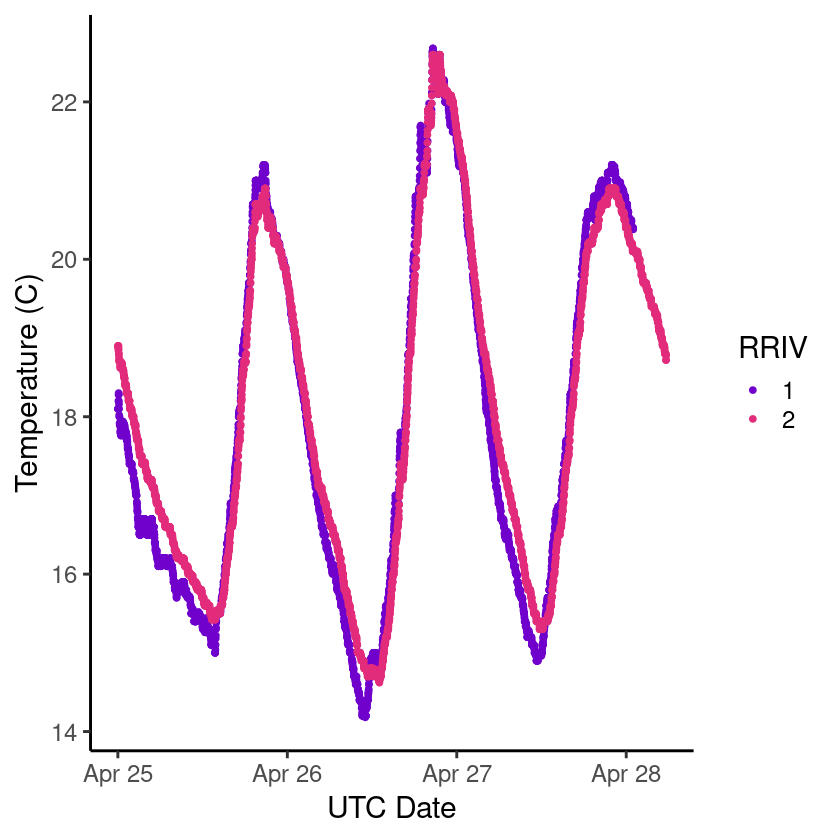

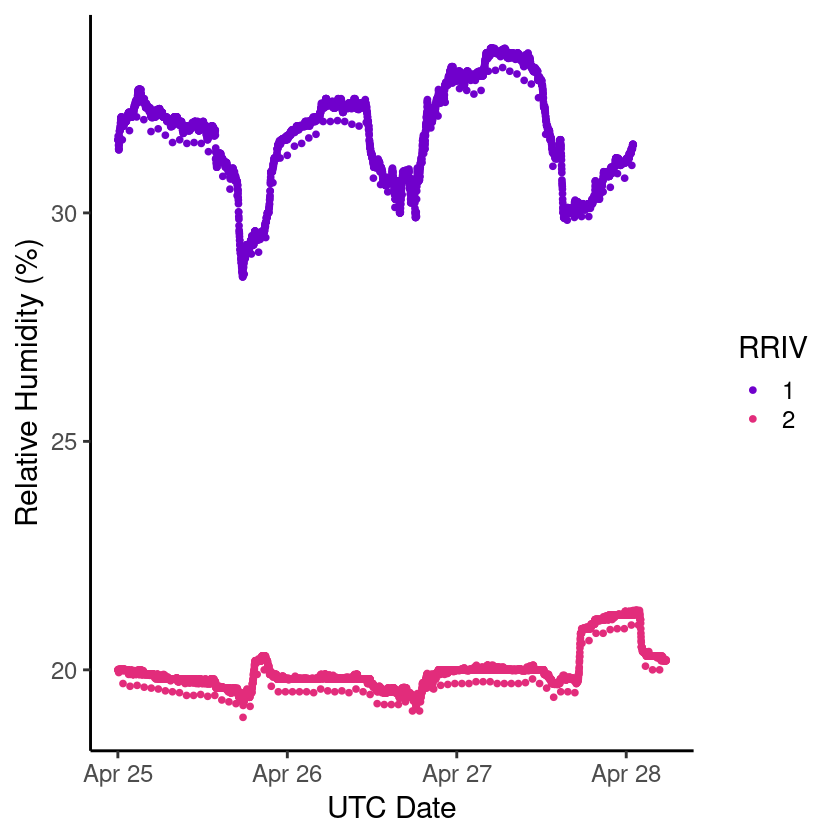

In [33]:
timeStart<-lubridate::as_datetime("2023-04-25 00:00:00 UTC")
timeEnd<-lubridate::as_datetime("2023-04-29 00:00:00 UTC")

subsetco2_time<-subsetco2[subsetco2$time.h>timeStart & subsetco2$time.h<timeEnd,]

a<-ggplot(data=subsetco2_time, aes(x=time.h, y=atlas_CO2_ppm, color=Sensor))+geom_point()+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y="CO2 (ppm)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
a

b<-ggplot(data=subsetco2_time, aes(x=time.h, y=ch4_raw_mV, color=Sensor))+geom_point()+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y="CH4 analog voltage (mV)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
b

c<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_C, color=Sensor))+geom_point()+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y="Temperature (C)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
c

d<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_RH, color=Sensor))+geom_point()+
    theme_classic(base_size=18)+
    labs(x="UTC Date",y="Relative Humidity (%)")+
    scale_color_manual(values=custom_colors, name ="RRIV")
d

In [34]:
# b<-ggplot(data=subsetco2_time, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+
#     theme_classic(base_size=18)+
#     labs(x="UTC Date",y="CH4 digital reading")+
#     scale_color_manual(values=custom_colors, name ="RRIV")
# b

In [35]:
# c<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_C, color=Sensor))+geom_point()+
#     theme_classic(base_size=18)+
#     labs(x="UTC Date",y="Temperature (C)")+
#     scale_color_manual(values=custom_colors, name ="RRIV")
# c

# d<-ggplot(data=subsetco2_time, aes(x=time.h, y=dht_RH, color=Sensor))+geom_point()+
#     theme_classic(base_size=18)+
#     labs(x="UTC Date",y="Relative Humidity (%)")+
#     scale_color_manual(values=custom_colors, name ="RRIV")
# d

In [36]:
# ch4co2Configuration<-ggarrange(a,b,
#           labels=c("A","B"),
#           common.legend=TRUE,
#           legend="bottom")
# ch4co2Configuration

# savePlot(plot = ch4co2Configuration,tag = "ch4co2Configuration", width = 1000, height= 600)

png 
  2

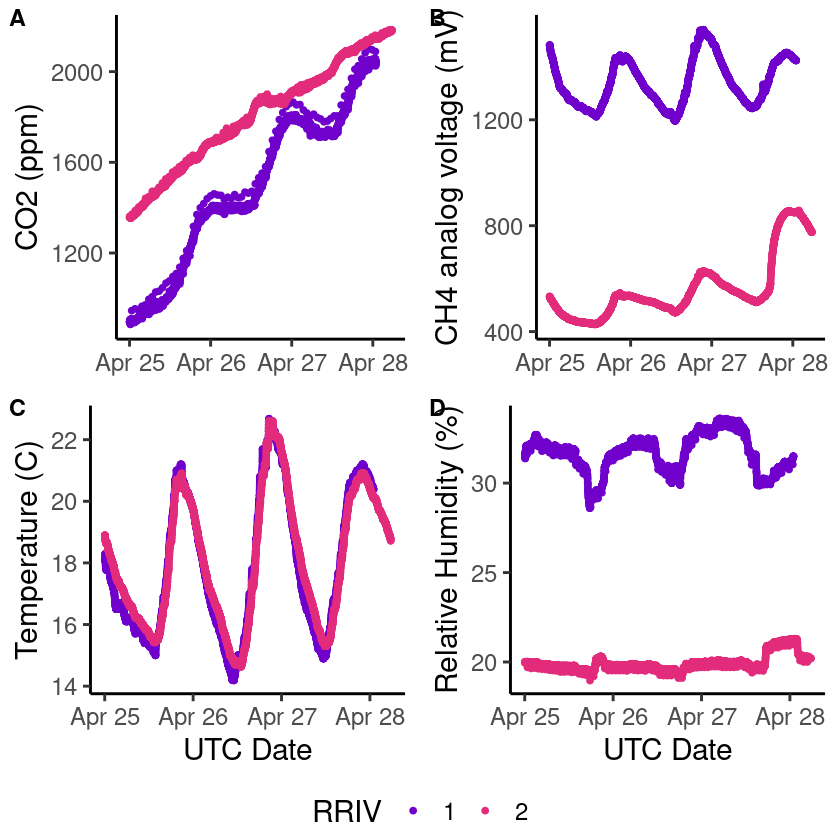

In [37]:
ch4co2Configuration2<-ggarrange(a+rremove("x.title"),b+rremove("x.title"),c,d,
          labels=c("A","B","C","D"),
          common.legend=TRUE,
          legend="bottom")
ch4co2Configuration2

savePlot(plot = ch4co2Configuration2,tag = "ch4co2Configuration3")

# conductivity data

In [38]:
head(conductivityData)

names(conductivityData)

unique(conductivityData$uuid)

,X,duuid,uuid,time.s,time.h,battery.V,temperature.V,data3,data4,data5,⋯,temperature.C,Burst,UserValue,UserNote,A2.PB1.V,A3.PC0.V,A4.PC1.V,A5.PC2.V,A6.PC3.V,...23
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,1,#K209_vThermistorProfile,30FF67064E54343838581043,162873909.000,1975-03-01 02:45:09.0,301,1727,2736,2285,1871,⋯,-1,0,0,0,NA,NA,NA,NA,NA,NA
2,2,#K209_vThermistorProfile,30FF67064E54343838581043,162873909.419,1975-03-01 02:45:09.419,520,1726,2650,2260,1894,⋯,-1,1,0,0,NA,NA,NA,NA,NA,NA
3,3,#K209_vThermistorProfile,30FF67064E54343838581043,162873909.857,1975-03-01 02:45:09.857,515,1726,2597,2245,1909,⋯,-1,2,0,0,NA,NA,NA,NA,NA,NA
4,4,#K209_vThermistorProfile,30FF67064E54343838581043,162873910.361,1975-03-01 02:45:11.361,517,1727,2561,2239,1922,⋯,-1,3,0,0,NA,NA,NA,NA,NA,NA
5,5,#K209_vThermistorProfile,30FF67064E54343838581043,162873910.799,1975-03-01 02:45:11.799,512,1726,2531,2226,1924,⋯,-1,4,0,0,NA,NA,NA,NA,NA,NA
6,6,#K209_vThermistorProfile,30FF67064E54343838581043,162873911.237,1975-03-01 02:45:13.237,512,1727,2499,2215,1926,⋯,-1,5,0,0,NA,NA,NA,NA,NA,NA


[1] "X"               "duuid"           "uuid"            "time.s"         
 [5] "time.h"          "battery.V"       "temperature.V"   "data3"          
 [9] "data4"           "data5"           "data6"           "conductivity.mS"
[13] "time.TC"         "C1"              "V1"              "C2"             
[17] "V2"              "M"               "B"               "temperature.C"  
[21] "Burst"           "UserValue"       "UserNote"        "A2.PB1.V"       
[25] "A3.PC0.V"        "A4.PC1.V"        "A5.PC2.V"        "A6.PC3.V"       
[29] "...23"

[1] "30FF67064E54343838581043"            
 [2] "32FF68064D4D323842451843"            
 [3] NA                                    
 [4] "32FF69064D4D323812391643"            
 [5] ">WT_VALUES: _K213_AMAZON_NO_METHANE_"
 [6] "32FF6E064D4D323841301743"            
 [7] "32FF6F064D4D323810381643"            
 [8] "48FF6B067865495618440867"            
 [9] "32FF67064D4D323846151743"            
[10] "33FF6A065053363628370743"

In [39]:
unique(conductivityData$duuid)
conductivityData<-conductivityData[!is.na(conductivityData$duuid) & conductivityData$duuid != "ebug",]
unique(conductivityData$duuid)

[1] "#K209_vThermistorProfile" "#K210_vThermistorProfile"
 [3] NA                         "_K213_AMAZON_NO_METHANE_"
 [5] "ebug"                     "_K214_AMAZON_NO_METHANE_"
 [7] "#K211_vThermistorProfile" "#K215_vThermistorProfile"
 [9] "_K218_AMAZON_NO_METHANE_" "_K219_AMAZON_NO_METHANE_"

[1] "#K209_vThermistorProfile" "#K210_vThermistorProfile"
[3] "_K213_AMAZON_NO_METHANE_" "_K214_AMAZON_NO_METHANE_"
[5] "#K211_vThermistorProfile" "#K215_vThermistorProfile"
[7] "_K218_AMAZON_NO_METHANE_" "_K219_AMAZON_NO_METHANE_"

In [40]:
names(conductivityData)
# head(conductivityData)
# str(conductivityData)

conductivityData$time.h<-lubridate::as_datetime(conductivityData$time.h)
conductivityData$time.s<-as.numeric(conductivityData$time.s)
conductivityData$conductivity.mS<-as.numeric(conductivityData$conductivity.mS)

range(conductivityData$time.s)

subset_time<-conductivityData[conductivityData$time.s>1620000000,]

[1] "X"               "duuid"           "uuid"            "time.s"         
 [5] "time.h"          "battery.V"       "temperature.V"   "data3"          
 [9] "data4"           "data5"           "data6"           "conductivity.mS"
[13] "time.TC"         "C1"              "V1"              "C2"             
[17] "V2"              "M"               "B"               "temperature.C"  
[21] "Burst"           "UserValue"       "UserNote"        "A2.PB1.V"       
[25] "A3.PC0.V"        "A4.PC1.V"        "A5.PC2.V"        "A6.PC3.V"       
[29] "...23"

Warning message:
“ 913 failed to parse.”


[1] 1.503400e+01 1.628396e+09

Warning message:
“Removed 667 rows containing missing values (geom_point).”


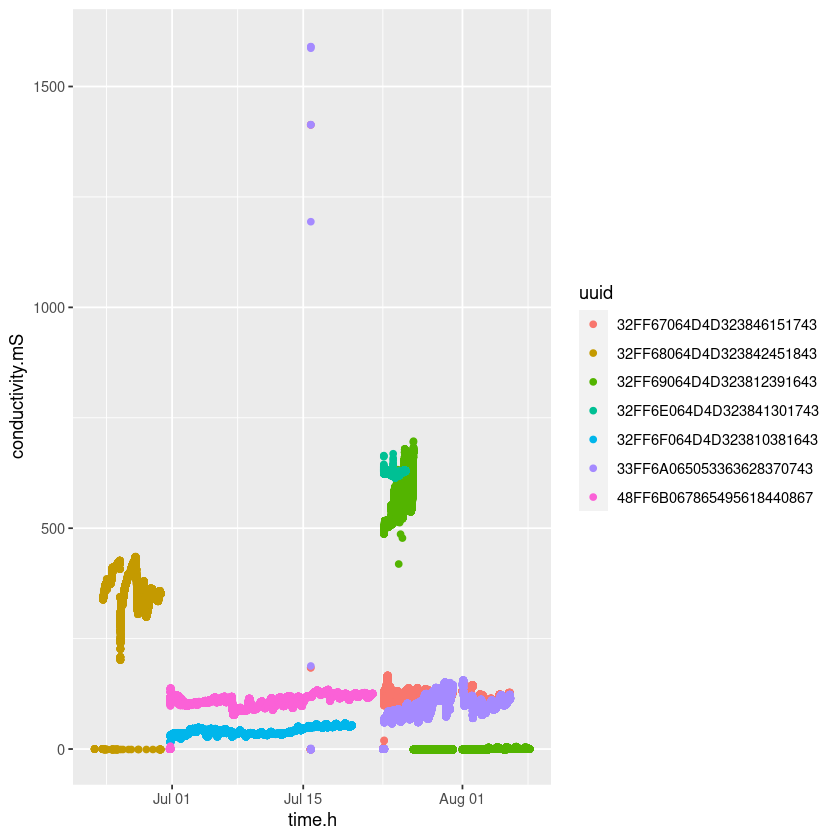

In [41]:
ggplot(data=subset_time, aes(x=time.h, y=conductivity.mS, color=uuid))+geom_point()

Warning message:
“Removed 657 rows containing missing values (geom_point).”


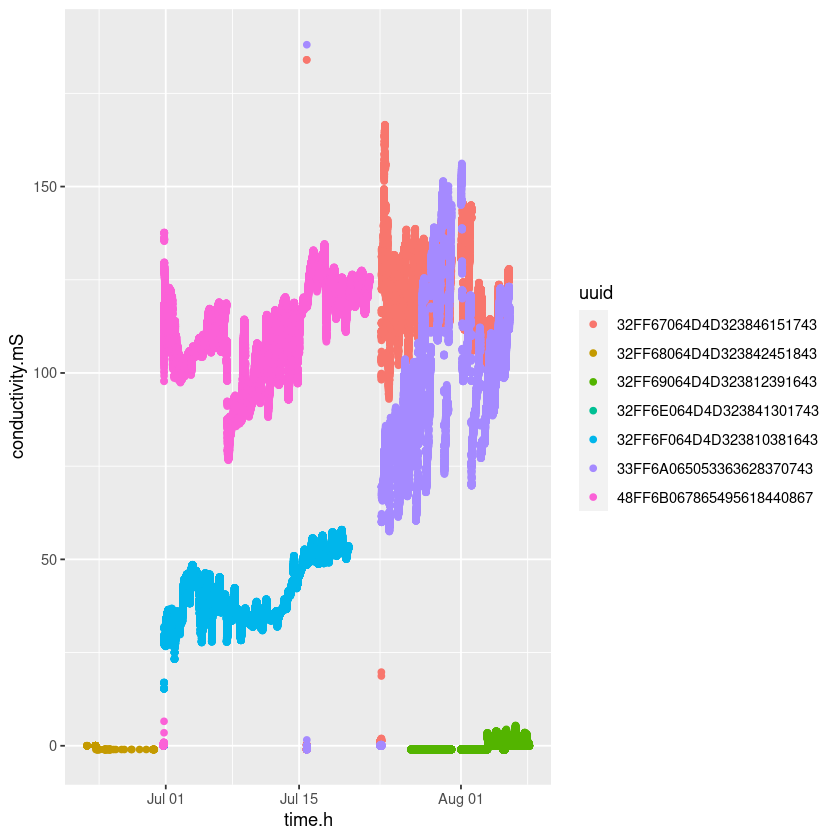

In [42]:
subset_values<-subset_time[subset_time$conductivity.mS<200,]
ggplot(data=subset_values, aes(x=time.h, y=conductivity.mS, color=uuid))+geom_point()

# battery tests, ghg setup 75% and 50% duty cycle
    ghg75_summary
    ghg75_raw
    ghg50_summary
    ghg50_raw
    ghg25_summary
    ghg25_raw

In [43]:
# ghg75_summary
# ghg75_raw
# ghg50_summary
# ghg50_raw
# names(ghg50_raw)
# unique(ghg50_raw$uuid)

# calculate time since deployment
ghg75_summary$timeDiff<-(ghg75_summary$time.s-ghg75_summary$deployed_at)/60/60 # convert seconds to hours
ghg50_summary$timeDiff<-(ghg50_summary$time.s-ghg50_summary$deployed_at)/60/60 # convert seconds to hours
ghg25_summary$timeDiff<-(ghg25_summary$time.s-ghg25_summary$deployed_at)/60/60 # convert seconds to hours

# add duty cycle column
ghg75_summary$dutyCycle<-"75%"
ghg50_summary$dutyCycle<-"50%"
ghg25_summary$dutyCycle<-"25%"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


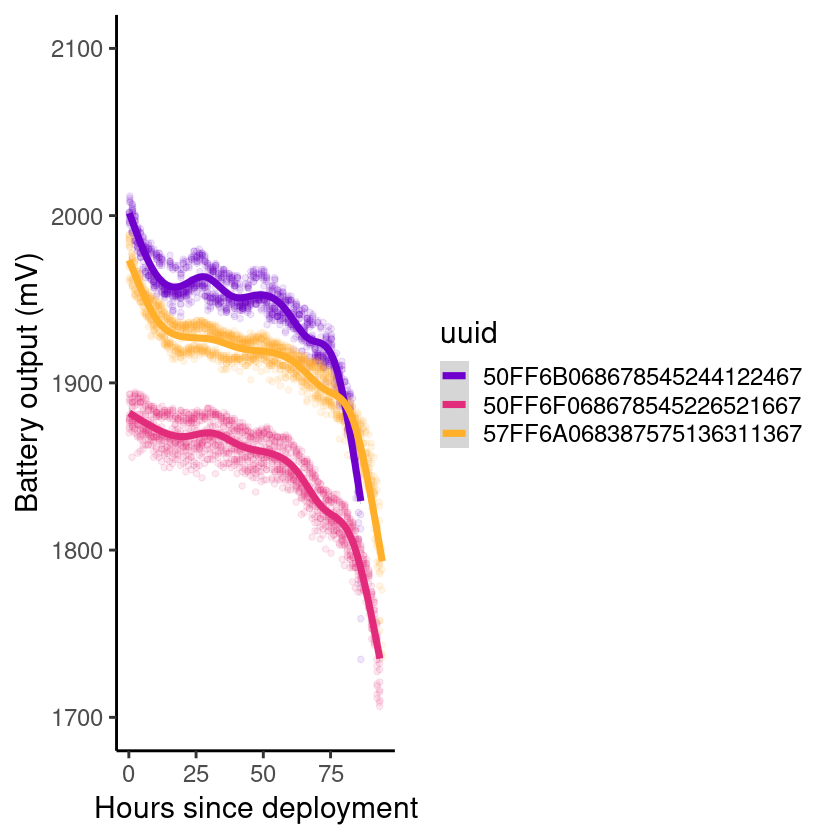

In [44]:
ggplot(ghg25_summary, aes(x=timeDiff,y=battery.mV,color=uuid))+
    theme_classic(base_size=18)+
    scale_y_continuous(limits = c(1700,2100))+
    labs(x="Hours since deployment",y="Battery output (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 50 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 50 rows containing missing values (geom_point).”


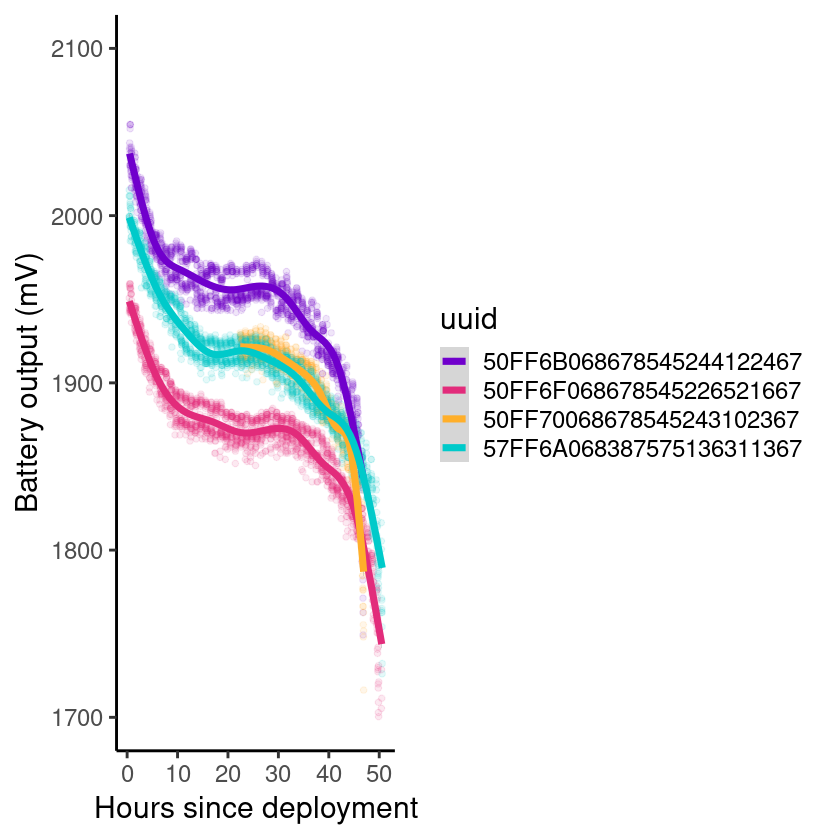

In [45]:
ggplot(ghg50_summary, aes(x=timeDiff,y=battery.mV,color=uuid))+
    theme_classic(base_size=18)+
    scale_y_continuous(limits = c(1700,2100))+
    labs(x="Hours since deployment",y="Battery output (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



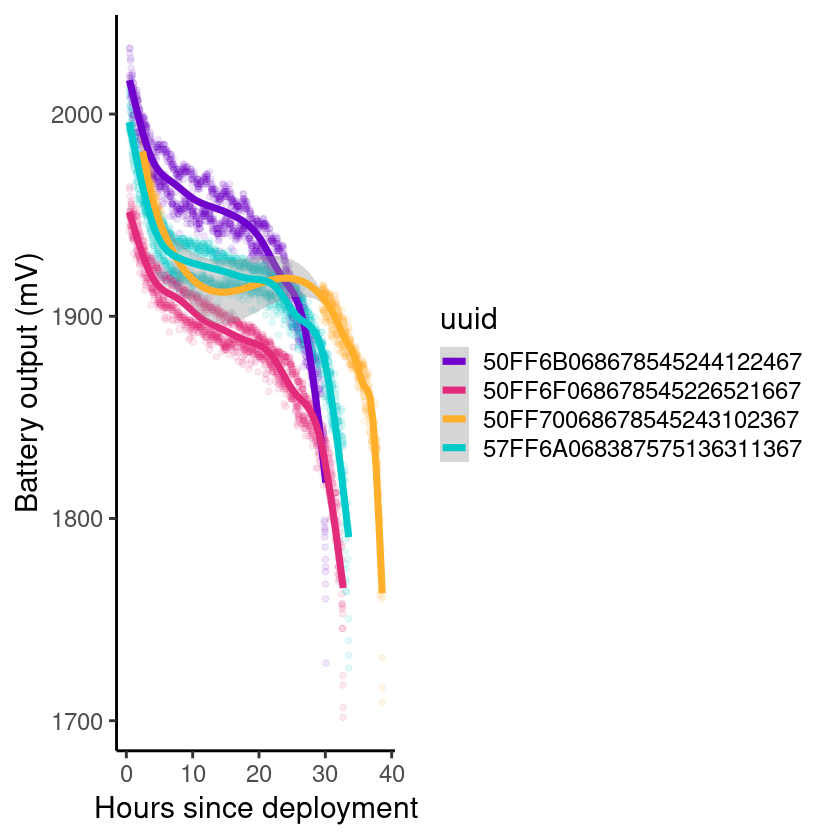

In [46]:
ggplot(ghg75_summary, aes(x=timeDiff,y=battery.mV,color=uuid))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery output (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)

In [47]:
# remove #2, incomplete data, was not working properly on bench due to loose wire on verter
ghg75_summary_3<-ghg75_summary[ghg75_summary$uuid != "50FF70068678545243102367",]
ghg50_summary_3<-ghg50_summary[ghg50_summary$uuid != "50FF70068678545243102367",]
ghg25_summary_3<-ghg25_summary # didn't include the other sensor

# create RRIV column based on uuid
UUIDdict=c(
    "50FF6B068678545244122467"="1",
    "50FF6F068678545226521667"="2",
    "57FF6A068387575136311367"="3"
    )
UUIDdict

ghg75_summary_3<-createNewColFromIDs(ghg75_summary_3,idCol="uuid",newCol="RRIV",dict = UUIDdict)
ghg50_summary_3<-createNewColFromIDs(ghg50_summary_3,idCol="uuid",newCol="RRIV",dict = UUIDdict)
ghg25_summary_3<-createNewColFromIDs(ghg25_summary_3,idCol="uuid",newCol="RRIV",dict = UUIDdict)

50FF6B068678545244122467 50FF6F068678545226521667 57FF6A068387575136311367 
                     "1"                      "2"                      "3"

In [48]:
# calculate duration of deployment for each rriv [estimate is 33.6hrs]
for(rriv in unique(ghg75_summary_3$RRIV)){
    subset<-ghg75_summary_3[ghg75_summary_3$RRIV==rriv,]
    trange<-range(subset$timeDiff)
    print(trange[2]-trange[1])
}

[1] 29.60795
[1] 32.25284
[1] 33.10049


In [49]:
# calculate duration of deployment for each rriv [estimate is 50.4hrs]
for(rriv in unique(ghg50_summary_3$RRIV)){
    subset<-ghg50_summary_3[ghg50_summary_3$RRIV==rriv,]
    trange<-range(subset$timeDiff)
    print(trange[2]-trange[1])
}

[1] 46.32052
[1] 50.08403
[1] 50.18502


In [50]:
# calculate duration of deployment for each rriv [estimate is 98.4hrs]
for(rriv in unique(ghg25_summary_3$RRIV)){
    subset<-ghg25_summary_3[ghg25_summary_3$RRIV==rriv,]
    trange<-range(subset$timeDiff)
    print(trange[2]-trange[1])
}

[1] 86.0839
[1] 93.21885
[1] 94.08365


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



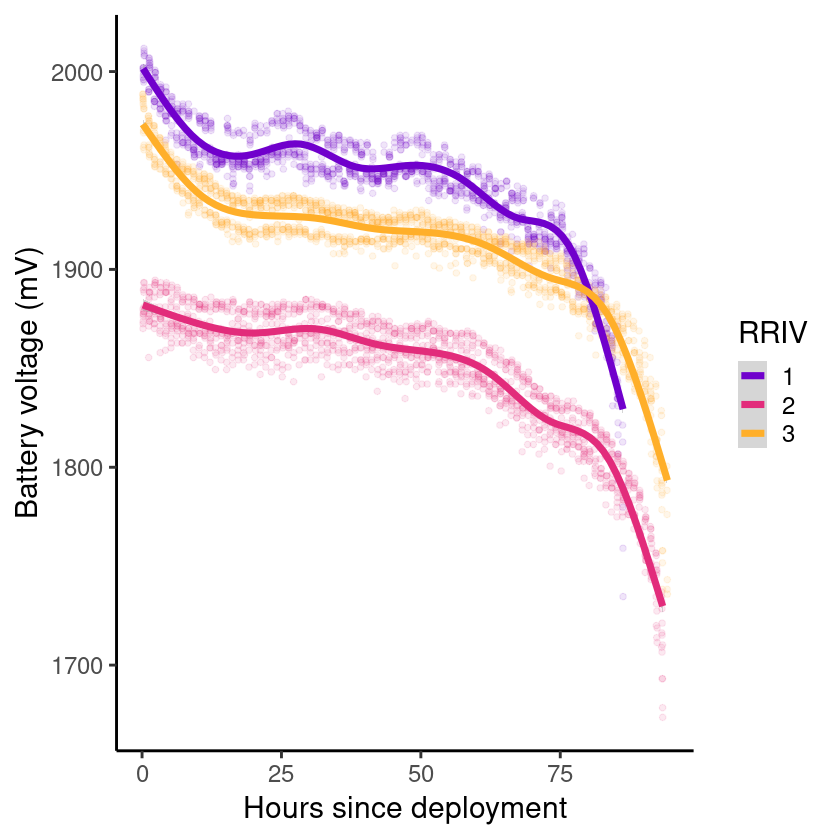

In [51]:
g25<-ggplot(ghg25_summary_3, aes(x=timeDiff,y=battery.mV,color=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)
g25

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



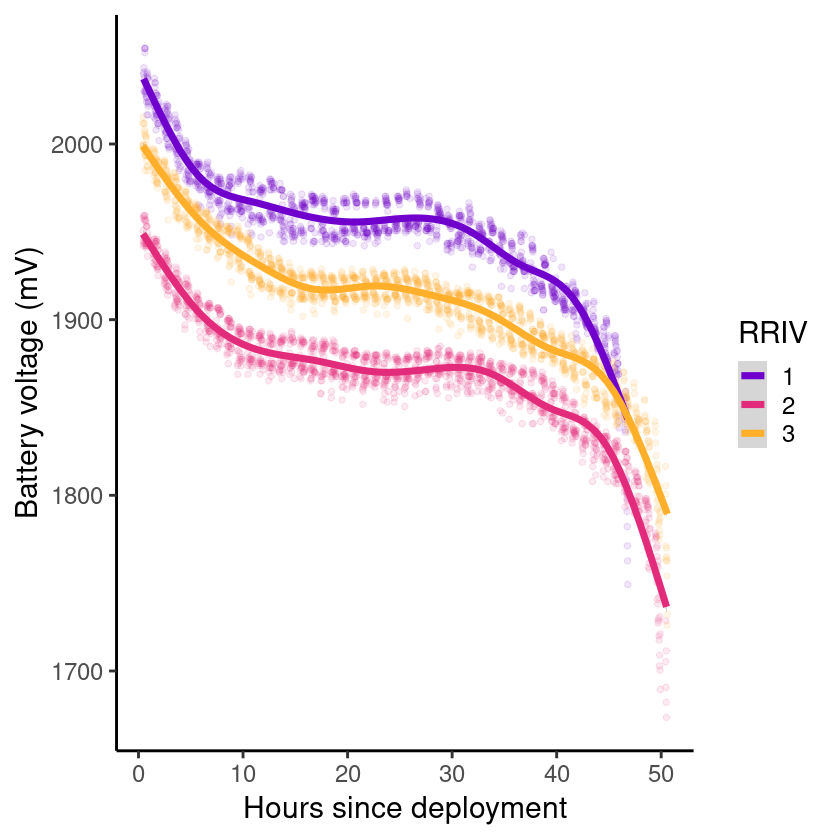

In [52]:
g50<-ggplot(ghg50_summary_3, aes(x=timeDiff,y=battery.mV,color=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)
g50

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



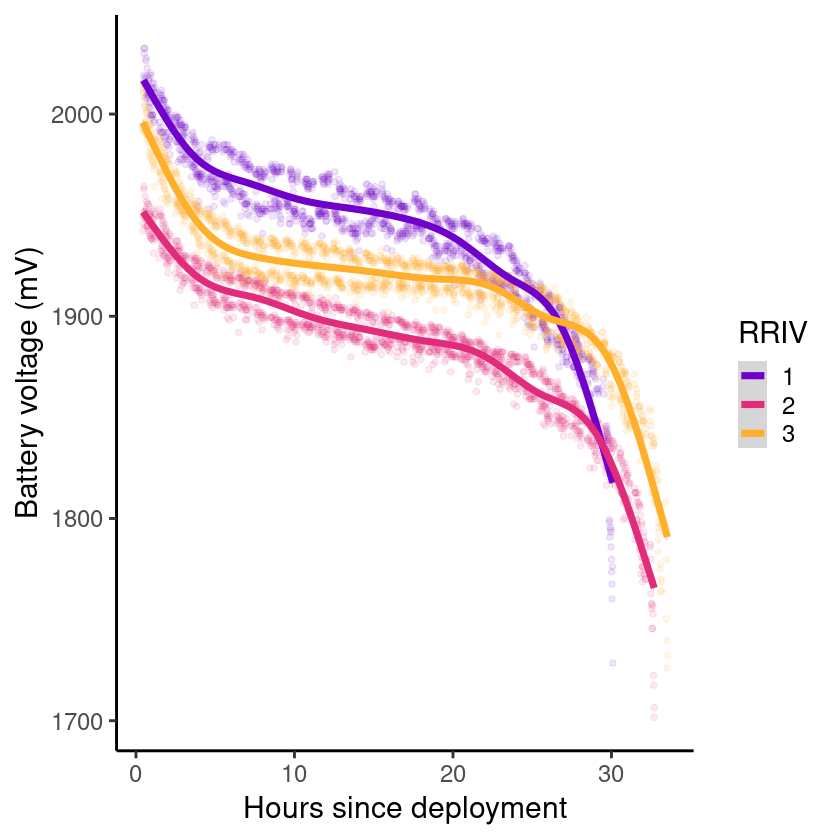

In [53]:
g75<-ggplot(ghg75_summary_3, aes(x=timeDiff,y=battery.mV,color=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_point(alpha=0.1)+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)
g75

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



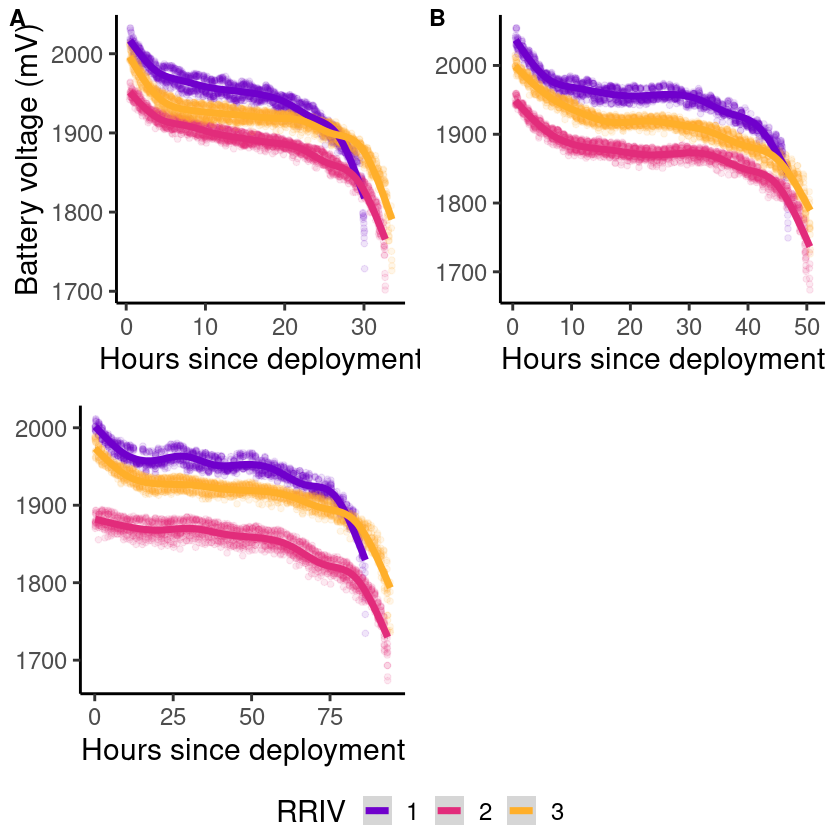

In [54]:
ghg_dutyCycle<-ggarrange(g75,g50+rremove("y.title"),g25+rremove("y.title"),
                         labels=c("A","B"),
                         common.legend=TRUE,
                         legend="bottom")
ghg_dutyCycle

# savePlot(plot=ghg_dutyCycle,tag = "ghg_dutyCycle_0")

In [55]:
# plot on same axis
ghg_full<-rbind(ghg75_summary_3, ghg50_summary_3, ghg25_summary_3)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



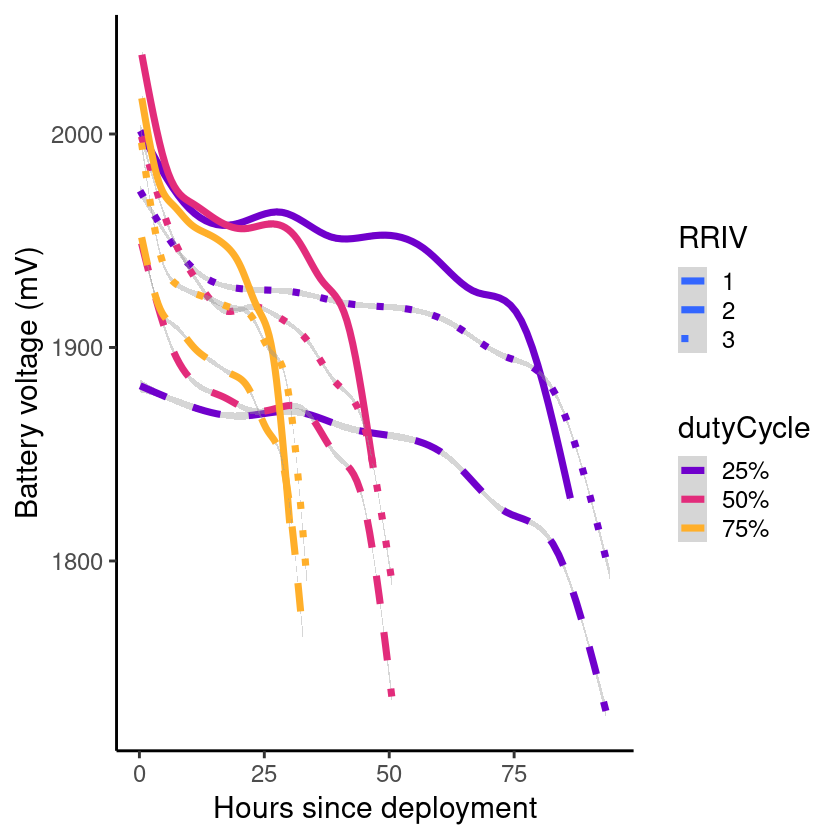

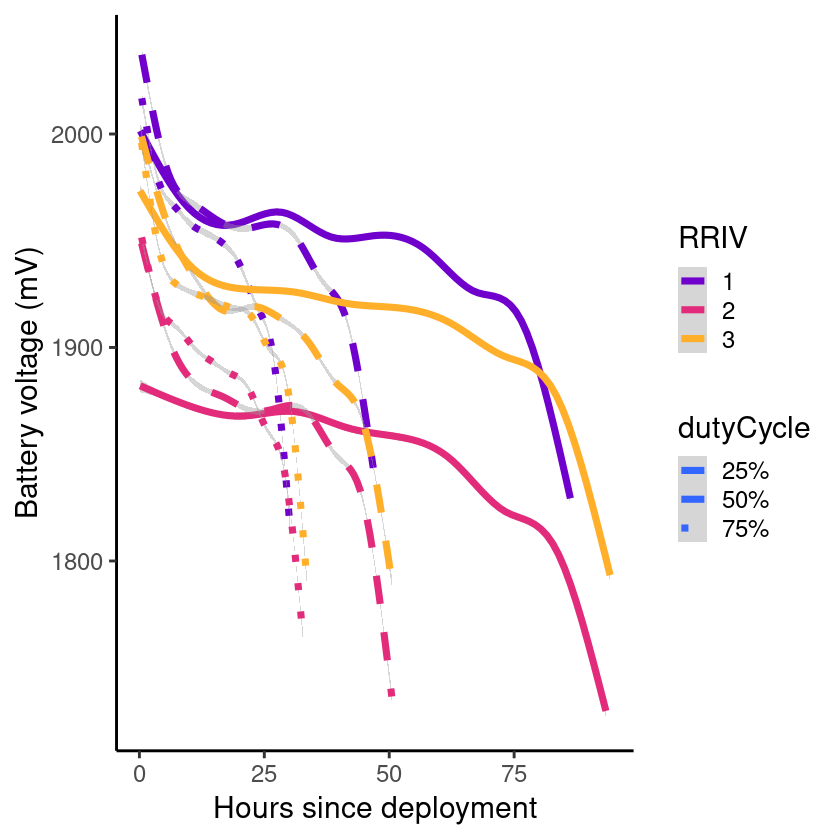

In [57]:
gfull<-ggplot(ghg_full, aes(x=timeDiff,y=battery.mV,color=dutyCycle, linetype=RRIV))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)+
    scale_linetype_manual(values = c("solid","dashed","dotted"))
gfull

# savePlot(plot=gfull,tag = "gfull")



gfull2<-ggplot(ghg_full, aes(x=timeDiff,y=battery.mV,color=RRIV, linetype=dutyCycle))+
    theme_classic(base_size=18)+
    labs(x="Hours since deployment",y="Battery voltage (mV)")+
    geom_smooth(size=2)+
    scale_color_manual(values=custom_colors)+
    scale_linetype_manual(values = c("solid","dashed","dotted"))
gfull2

# savePlot(plot=gfull2,tag = "gfull2")